In [127]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from load_and_save_files import load_mnist, load_alphabet

In [128]:
train_x_mnist, train_y_mnist, test_x_mnist, test_y_mnist = load_mnist()

print('Shape of training data: ', train_x_mnist.shape)
print('Shape of training labels: ', train_y_mnist.shape)
print('Shape of testing data: ', test_x_mnist.shape)
print('Shape of testing labels: ', test_y_mnist.shape)

train_x_mnist, train_y_mnist, test_x_mnist, test_y_mnist = [pd.DataFrame(x) for x in [train_x_mnist, train_y_mnist, test_x_mnist, test_y_mnist]]

# suffle
train_x_mnist, train_y_mnist = train_x_mnist.sample(frac=1, random_state=42), train_y_mnist.sample(frac=1, random_state=42)
test_x_mnist, test_y_mnist = test_x_mnist.sample(frac=1, random_state=42), test_y_mnist.sample(frac=1, random_state=42)

Shape of training data:  (60000, 784)
Shape of training labels:  (60000,)
Shape of testing data:  (10000, 784)
Shape of testing labels:  (10000,)


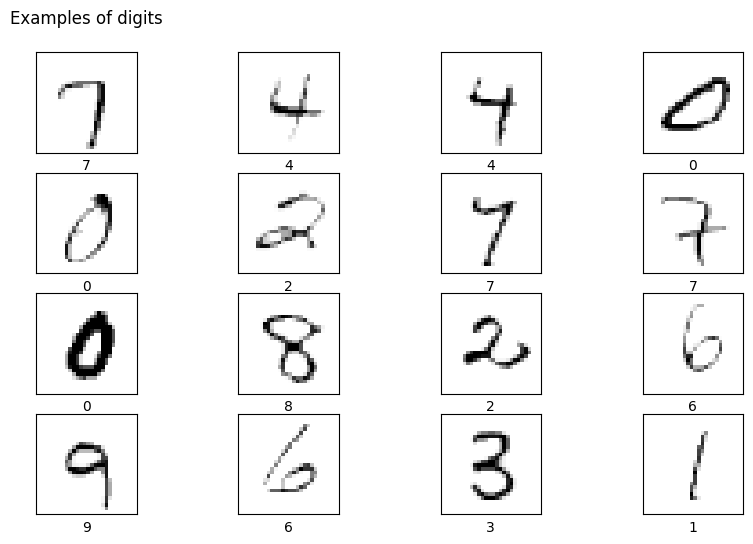

In [129]:
# show the first 16 images with matplotlib and write the labels on the plot
fig, ax = plt.subplots(4, 4, figsize=(10, 6))

for i, axi in enumerate(ax.flat):
    axi.imshow(train_x_mnist.iloc[i].values.reshape(28, 28), cmap='binary')
    axi.set(xticks=[], yticks=[], xlabel=train_y_mnist.iloc[i].values[0])
ax[0, 0].set(title='Examples of digits\n');
plt.show()

In [130]:
train_x_alphabet, train_y_alphabet, valid_x_alphabet, valid_y_alphabet, test_x_alphabet, test_y_alphabet = load_alphabet()
# add validation to the end of training set
train_x_alphabet = np.concatenate((train_x_alphabet, valid_x_alphabet))
train_y_alphabet = np.concatenate((train_y_alphabet, valid_y_alphabet))

print('Shape of training data: ', train_x_alphabet.shape)
print('Shape of training labels: ', train_y_alphabet.shape)
print('Shape of testing data: ', test_x_alphabet.shape)
print('Shape of testing labels: ', test_y_alphabet.shape)

# Convert to pandas dataframe
train_x_alphabet, train_y_alphabet, test_x_alphabet, test_y_alphabet = [pd.DataFrame(x) for x in [train_x_alphabet, train_y_alphabet, test_x_alphabet, test_y_alphabet]]

# suffle
train_x_alphabet, train_y_alphabet = train_x_alphabet.sample(frac=1, random_state=42), train_y_alphabet.sample(frac=1, random_state=42)
test_x_alphabet, test_y_alphabet = test_x_alphabet.sample(frac=1, random_state=42), test_y_alphabet.sample(frac=1, random_state=42)

Shape of training data:  (14704, 784)
Shape of training labels:  (14704,)
Shape of testing data:  (1792, 784)
Shape of testing labels:  (1792,)


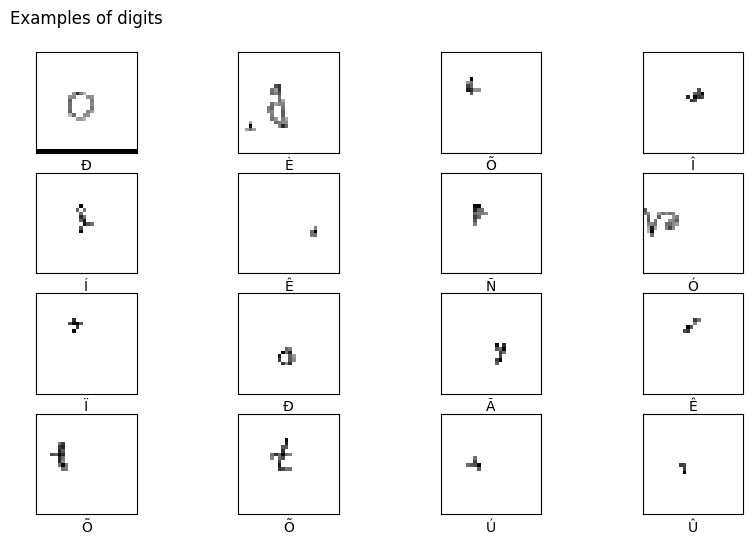

In [131]:
# show the first 16 images with matplotlib and write the labels on the plot
fig, ax = plt.subplots(4, 4, figsize=(10, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(train_x_alphabet.iloc[i].values.reshape(28, 28), cmap='binary')
    letter = chr(train_y_alphabet.iloc[i].values[0] + ord('a'))
    axi.set(xticks=[], yticks=[], xlabel=letter)
ax[0, 0].set(title='Examples of digits\n');
plt.show()

In [132]:
# Take %10 of mnsit data and add to alphabet data
train_x_mnist = train_x_mnist.iloc[:int(len(train_x_mnist)*0.1)]
train_y_mnist = train_y_mnist.iloc[:int(len(train_y_mnist)*0.1)]
train_x = pd.concat([train_x_alphabet, train_x_mnist])
train_y = pd.concat([train_y_alphabet, train_y_mnist])

# same for test data
test_x_mnist = test_x_mnist.iloc[:int(len(test_x_mnist)*0.075)]
test_y_mnist = test_y_mnist.iloc[:int(len(test_y_mnist)*0.075)]
test_x = pd.concat([test_x_alphabet, test_x_mnist])
test_y = pd.concat([test_y_alphabet, test_y_mnist])

print('Shape of training data: ', train_x.shape)
print('Shape of training labels: ', train_y.shape)
print('Shape of testing data: ', test_x.shape)
print('Shape of testing labels: ', test_y.shape)

Shape of training data:  (20704, 784)
Shape of training labels:  (20704, 1)
Shape of testing data:  (2542, 784)
Shape of testing labels:  (2542, 1)


In [133]:
# Normalize
test_x = test_x / 255.0

In [134]:
def confusion_matrix_plot(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    # cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(15, 15))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', square=True)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(title)
    plt.show()

In [135]:
mlp_model = pickle.load(open('multi_layer_perceptron.pkl', 'rb'))
y_pred = mlp_model.predict(test_x)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        69
           1       0.98      0.96      0.97        94
           2       0.94      0.89      0.92        92
           3       0.89      0.90      0.89        87
           4       0.93      0.93      0.93        68
           5       0.90      0.85      0.88        54
           6       0.95      0.97      0.96        65
           7       0.92      0.91      0.91        65
           8       0.88      0.93      0.91        72
           9       0.94      0.88      0.91        84
          97       0.72      0.85      0.78        68
          98       0.85      0.83      0.84        72
          99       0.90      0.79      0.84        67
         100       0.94      0.82      0.88        57
         101       0.85      0.78      0.81        64
         102       0.95      0.95      0.95        78
         103       0.97      0.98      0.98        64
         104       0.87    

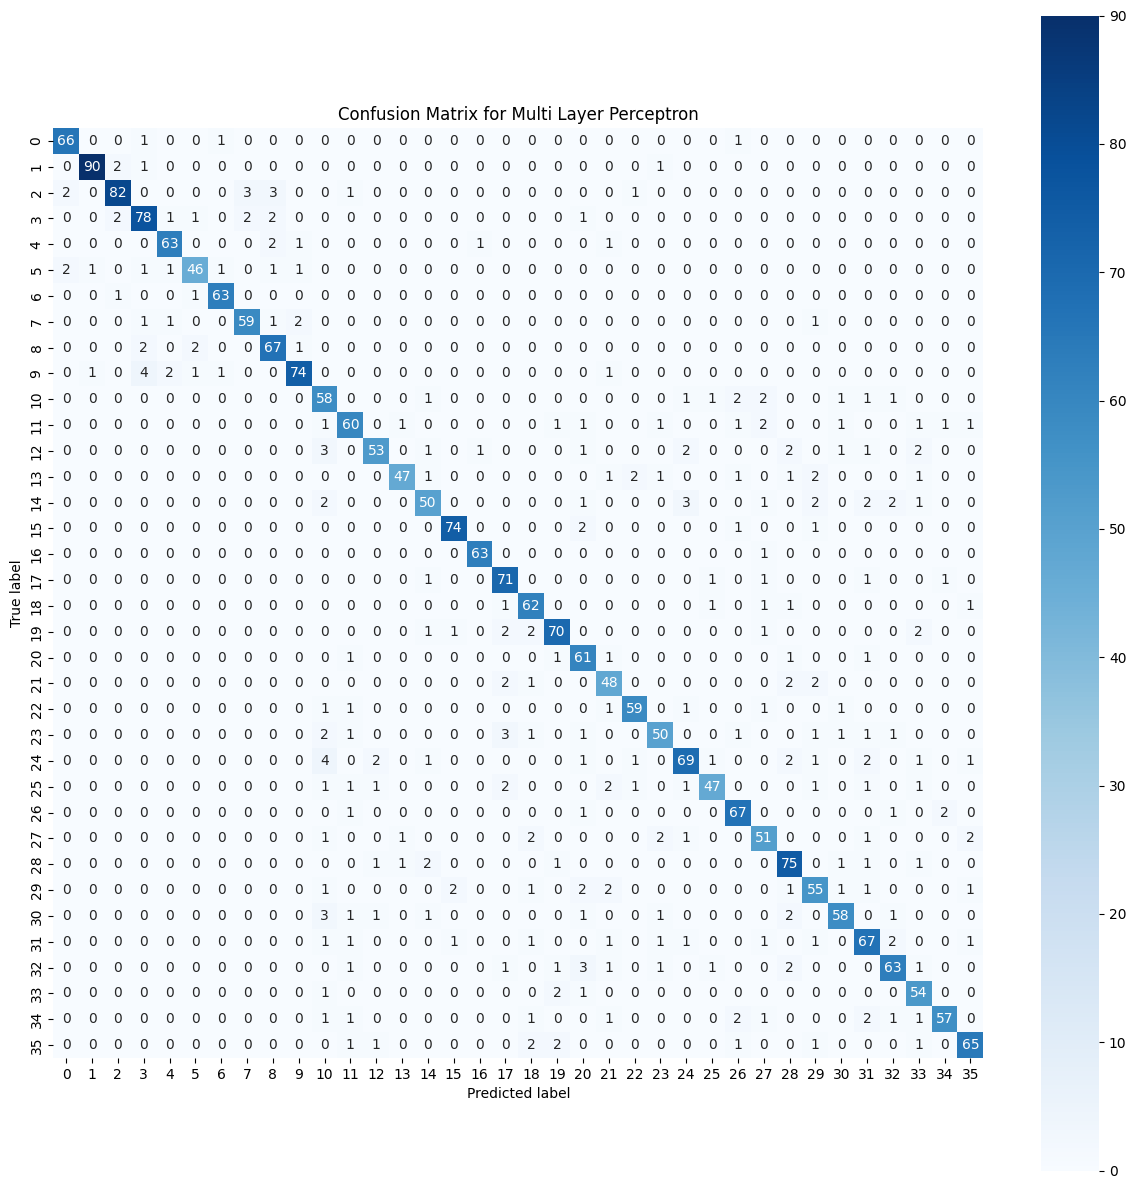

In [136]:
# confusion matrix
confusion_matrix_plot(test_y, y_pred, 'Confusion Matrix for Multi Layer Perceptron')

In [137]:
rf_model = pickle.load(open('random_forest.pkl', 'rb'))
y_pred = rf_model.predict(test_x)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        69
           1       0.95      0.98      0.96        94
           2       0.94      0.84      0.89        92
           3       0.90      0.91      0.90        87
           4       0.97      0.96      0.96        68
           5       0.94      0.87      0.90        54
           6       0.88      0.98      0.93        65
           7       0.91      0.92      0.92        65
           8       0.91      0.86      0.89        72
           9       0.91      0.93      0.92        84
          97       0.85      0.85      0.85        68
          98       0.88      0.82      0.85        72
          99       0.88      0.85      0.86        67
         100       0.86      0.84      0.85        57
         101       0.87      0.86      0.87        64
         102       0.95      0.95      0.95        78
         103       0.98      0.98      0.98        64
         104       0.92    

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


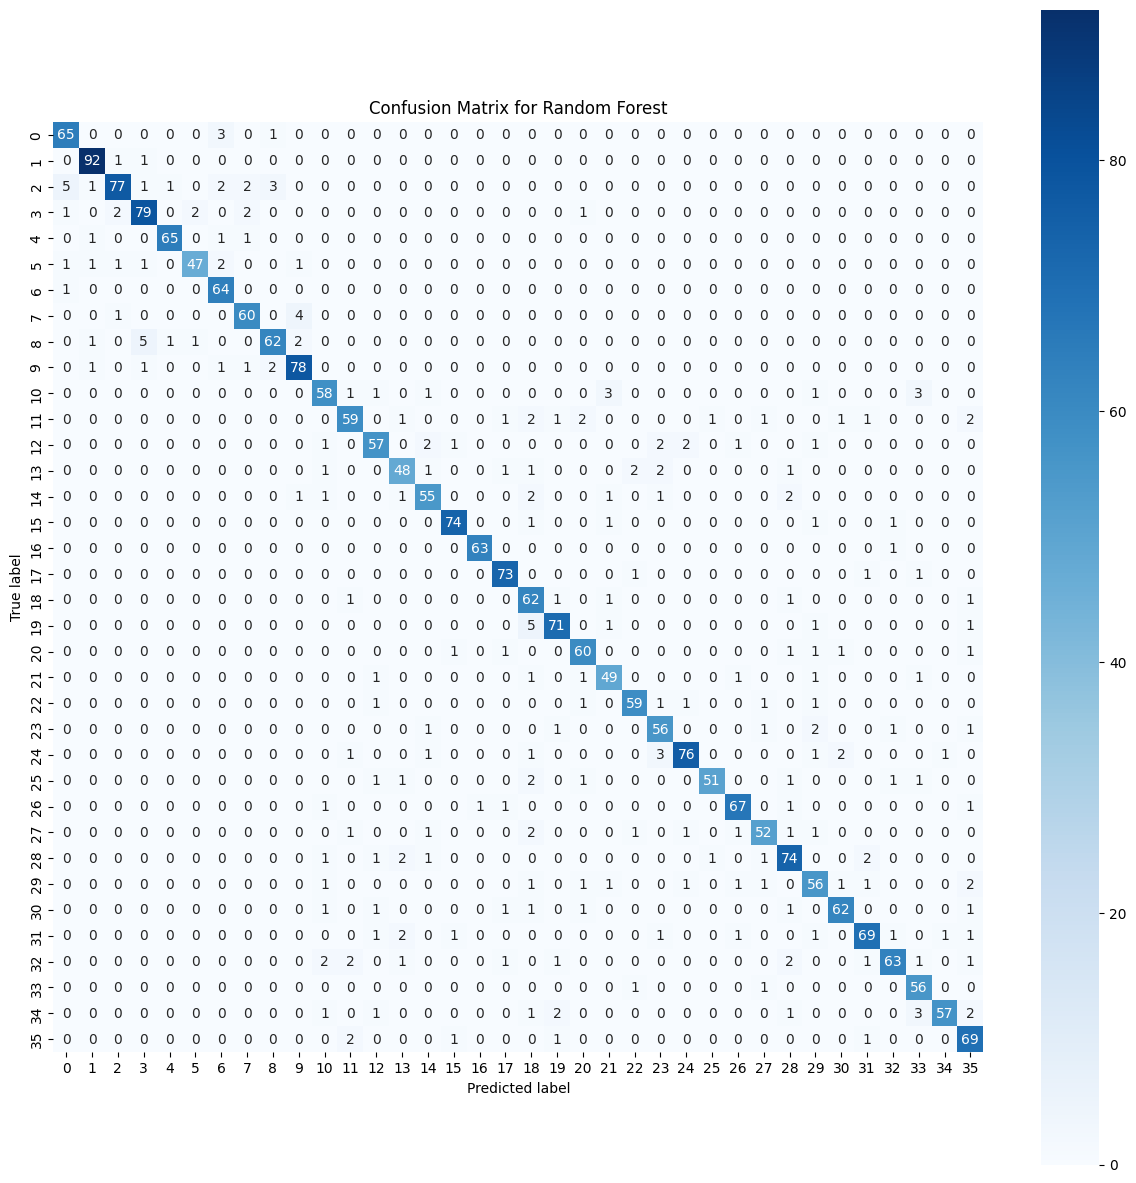

In [138]:
# confusion matrix
confusion_matrix_plot(test_y, y_pred, 'Confusion Matrix for Random Forest')

In [96]:
knn_model = pickle.load(open('k_nearest_neighbors.pkl', 'rb'))
y_pred = knn_model.predict(test_x)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       254
           1       0.87      0.99      0.93       299
           2       0.97      0.74      0.84       275
           3       0.93      0.85      0.88       259
           4       0.91      0.85      0.88       247
           5       0.88      0.76      0.81       188
           6       0.94      0.92      0.93       238
           7       0.89      0.84      0.87       242
           8       0.96      0.76      0.85       239
           9       0.89      0.86      0.88       259
          97       0.28      0.59      0.38        68
          98       0.28      0.56      0.37        72
          99       0.38      0.52      0.44        67
         100       0.47      0.61      0.53        57
         101       0.30      0.58      0.40        64
         102       0.57      0.67      0.61        78
         103       0.92      0.52      0.66        64
         104       0.60    

/Users/turhancan97/opt/anaconda3/envs/number-letter-recognition/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


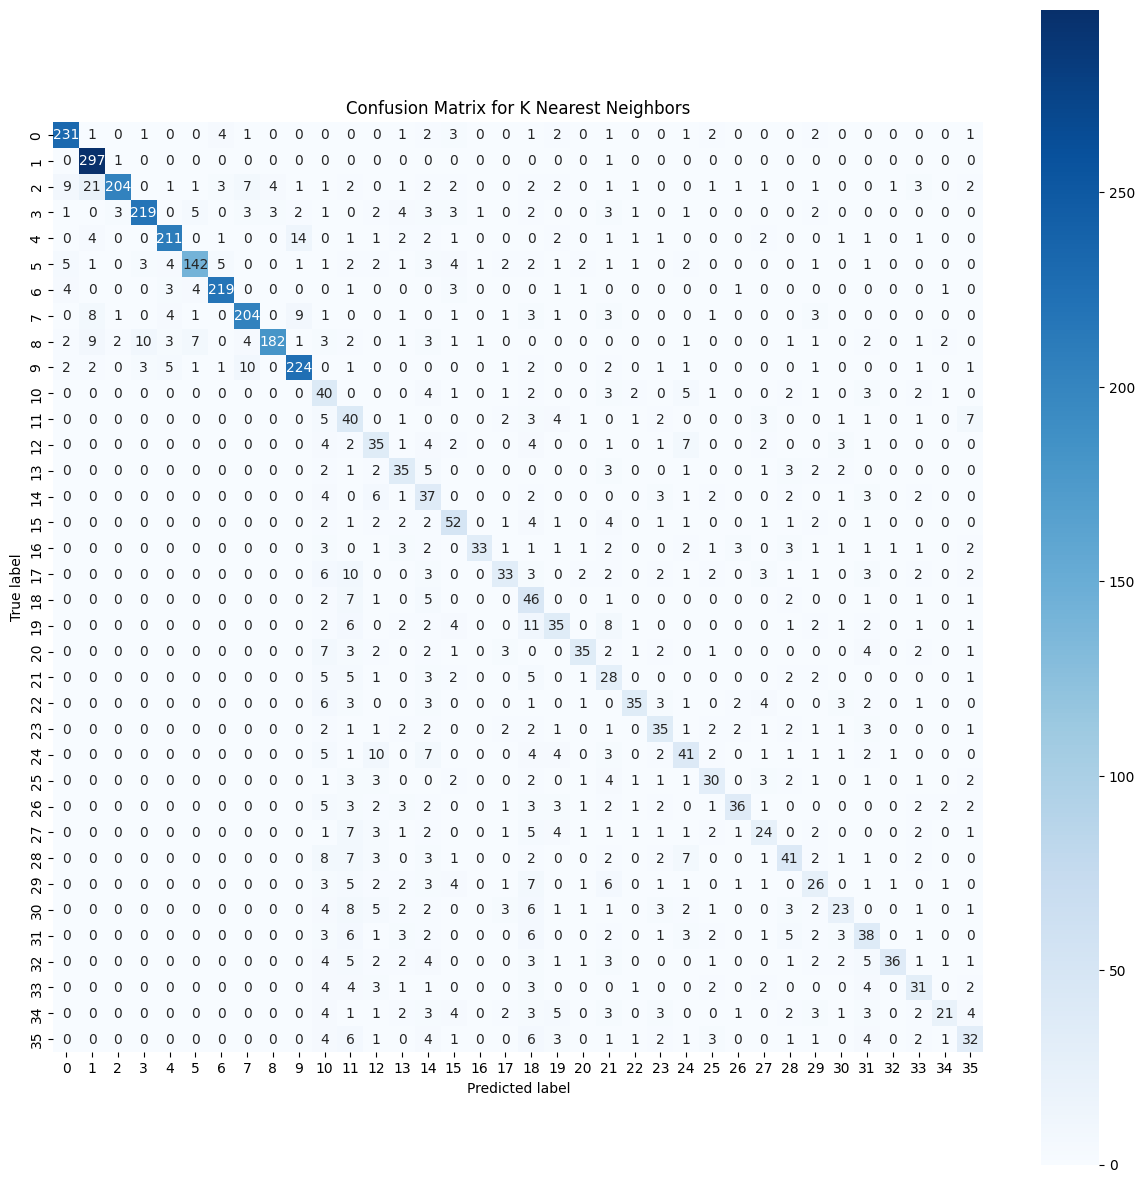

In [97]:
# confusion matrix
confusion_matrix_plot(test_y, y_pred, 'Confusion Matrix for K Nearest Neighbors')


In [98]:
svm_model = pickle.load(open('support_vector_machine.pkl', 'rb'))
y_pred = svm_model.predict(test_x)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       254
           1       0.98      0.98      0.98       299
           2       0.94      0.93      0.94       275
           3       0.96      0.93      0.94       259
           4       0.93      0.94      0.94       247
           5       0.92      0.93      0.92       188
           6       0.97      0.97      0.97       238
           7       0.96      0.93      0.94       242
           8       0.94      0.92      0.93       239
           9       0.94      0.92      0.93       259
          97       0.35      0.10      0.16        68
          98       0.48      0.22      0.30        72
          99       0.38      0.21      0.27        67
         100       0.19      0.44      0.27        57
         101       0.09      0.14      0.11        64
         102       0.53      0.24      0.33        78
         103       0.81      0.55      0.65        64
         104       0.68    

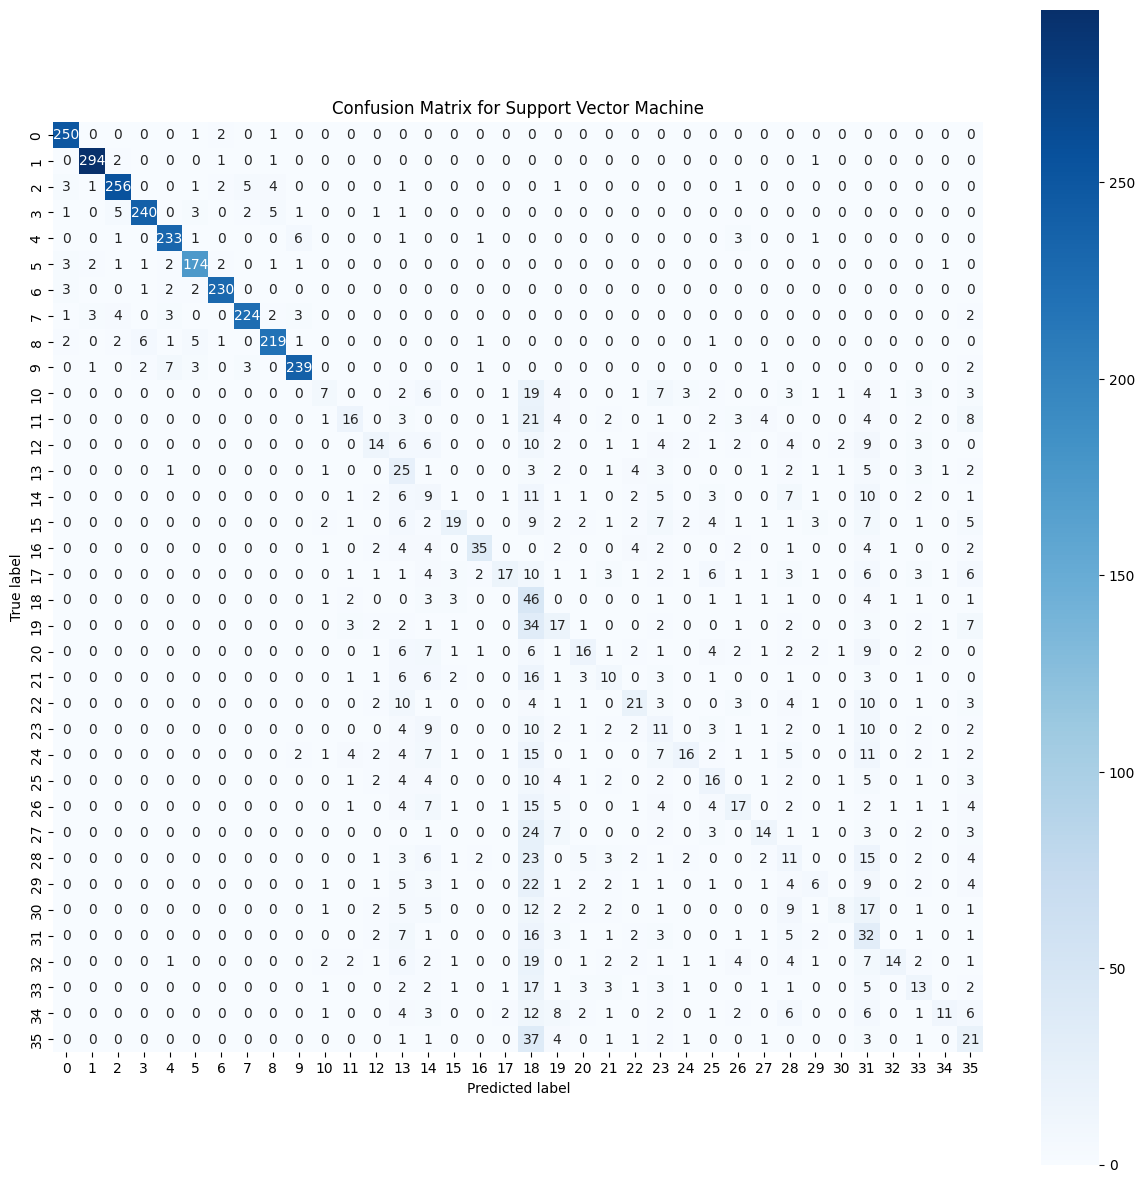

In [99]:
# confusion matrix
confusion_matrix_plot(test_y, y_pred, 'Confusion Matrix for Support Vector Machine')